<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Functions-calculate-climatological-variability---mean,-min/max.-std" data-toc-modified-id="Functions-calculate-climatological-variability---mean,-min/max.-std-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Functions calculate climatological variability - mean, min/max. std</a></span></li><li><span><a href="#Read-fronts" data-toc-modified-id="Read-fronts-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read fronts</a></span><ul class="toc-item"><li><span><a href="#BIOPERIANT12-model-fronts-interannual" data-toc-modified-id="BIOPERIANT12-model-fronts-interannual-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>BIOPERIANT12 model fronts interannual</a></span></li><li><span><a href="#OBS-WOA13-climatology-derived--fronts" data-toc-modified-id="OBS-WOA13-climatology-derived--fronts-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>OBS WOA13 climatology-derived  fronts</a></span></li><li><span><a href="#ORSI-1995-mean-SAF-and-PF" data-toc-modified-id="ORSI-1995-mean-SAF-and-PF-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>ORSI 1995 mean SAF and PF</a></span></li><li><span><a href="#Freeman-and-Lovenduski-(2016)-Satellite-Polar-front" data-toc-modified-id="Freeman-and-Lovenduski-(2016)-Satellite-Polar-front-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Freeman and Lovenduski (2016) Satellite Polar front</a></span></li></ul></li><li><span><a href="#Plot-fronts-and-basins" data-toc-modified-id="Plot-fronts-and-basins-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plot fronts and basins</a></span><ul class="toc-item"><li><span><a href="#Get-model-bathy-and-mask-for-plot" data-toc-modified-id="Get-model-bathy-and-mask-for-plot-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Get model bathy and mask for plot</a></span></li><li><span><a href="#Plot-parameters" data-toc-modified-id="Plot-parameters-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Plot parameters</a></span></li></ul></li></ul></div>

# Plot model fronts vs data

Derived from temperature  

Reference: Russell, J. L., Kamenkovich, I., Bitz, C., Ferrari, R., Gille, S. T., Goodman, P. J., Hallberg, R., Johnson, K., Khazmutdinova, K., Mari- nov, I., Mazloff, M., Riser, S., Sarmiento, J. L., Speer, K., Talley, L. D., and Wanninkhof, R.: Metrics for the Evaluation of the Southern Ocean in Coupled Climate Models and Earth System Models, Journal of Geophysical Research: Oceans, 123, 3120–3143, https://doi.org/10.1002/2017JC013461, 2018.

In [1]:
import sys
import os
src_path = os.path.abspath(os.path.join(os.getcwd(), '../src'))
sys.path.append(src_path)
from bp12_tools.grid_utils import get_bp12grid
from bp12_tools.plot_utils.formatting import get_rbg_colors

import numpy as np
import xarray as xr
import pandas as pd

import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
%matplotlib inline

---

## Functions calculate climatological variability - mean, min/max. std

In [2]:
def reorder_front(lon_in, var_in):
    '''
    Take in lon and lat front/surface and reorder 
    into ocean basins for plotting
    '''
    ind_70w = np.where((lon_in--70)>0)[0][0]-1
    lon_out  = np.concatenate((lon_in[ind_70w:],lon_in[:ind_70w+1]))
    ind_180 = np.argmin(np.abs(lon_out-180))+1
    lon_out[ind_180:] = lon_out[ind_180:]+360
    if var_in.ndim == 1:
        var_out = np.concatenate((var_in[ind_70w:], var_in[:ind_70w+1]))
    elif var_in.ndim == 2:
        var_out = np.concatenate((var_in[:,ind_70w:], var_in[:,:ind_70w+1]), axis=1)
    return lon_out, var_out

def get_front_stats(ds_frontin):
    '''
    Take in front dataset 
    calculate time mean, min max in time
    return above sorted by basin
    '''
    frontlon, frontmean = reorder_front(ds_frontin.lon.values, ds_frontin.lat.mean('time').values)
    _, frontstd  = reorder_front(ds_frontin.lon.values, ds_frontin.lat.std('time').values)
    _, frontmin  = reorder_front(ds_frontin.lon.values, ds_frontin.lat.min('time').values)
    _, frontmax  = reorder_front(ds_frontin.lon.values, ds_frontin.lat.max('time').values)
    return frontlon, frontmean, frontstd, frontmin, frontmax 

## Read fronts

### BIOPERIANT12 model fronts interannual

In [3]:
ds_mdl_saf = xr.open_mfdataset(f"../data/FRONTS/BIOPERIANT12_SAF_IA_monthly.nc")
ds_mdl_pf  = xr.open_mfdataset(f"../data/FRONTS/BIOPERIANT12_PF_IA_monthly.nc")

In [4]:
saf_mdl_lon, saf_mdl_mean, saf_mdl_std, saf_mdl_min, saf_mdl_max =  get_front_stats(ds_mdl_saf)
pf_mdl_lon, pf_mdl_mean, pf_mdl_std, pf_mdl_min, pf_mdl_max =  get_front_stats(ds_mdl_pf)

### OBS WOA13 climatology-derived  fronts

In [5]:
ds_obs_saf = xr.open_mfdataset(f"../data/FRONTS/WOA13_SAF_clim_monthly.nc")
ds_obs_pf  = xr.open_mfdataset(f"../data/FRONTS/WOA13_PF_clim_monthly.nc")

In [6]:
saf_obs_lon, saf_obs_mean, saf_obs_std, saf_obs_min, saf_obs_max =  get_front_stats(ds_obs_saf)
pf_obs_lon,  pf_obs_mean, pf_obs_std, pf_obs_min, pf_obs_max =  get_front_stats(ds_obs_pf)

### ORSI 1995 mean SAF and PF

In [7]:
ds_orsi_saf = xr.open_mfdataset(f"../data/FRONTS/ORSI_SAF_clim.nc")
ds_orsi_pf  = xr.open_mfdataset(f"../data/FRONTS/ORSI_PF_clim.nc")

In [8]:
saf_ors_lon,  saf_ors_lat = reorder_front(ds_orsi_saf.lon,  ds_orsi_saf.lat)
pf_ors_lon,  pf_ors_lat = reorder_front(ds_orsi_pf.lon,  ds_orsi_pf.lat)

### Freeman and Lovenduski (2016) Satellite Polar front

In [9]:
satellite_ds = xr.open_dataset(f"../data/FRONTS/Polar_Front_weekly.nc",decode_times=False)

Cut to current time period 2002-2009  
(overwrite time_stamp into time format)

In [10]:
ts_temp = [pd.Timestamp(int(tstamp[:4]), int(tstamp[4:6]), int(tstamp[6:8])) for tstamp in satellite_ds.time_stamp.values.astype(str)] 
satellite_ds['time'] = ts_temp
pf_satellite = satellite_ds.PFw.sel(time=slice(pd.Timestamp(2002,1,1),pd.Timestamp(2009,12,31)))

In [11]:
## sort lon
pf_satellite['longitude'] = (((pf_satellite.longitude + 180) % 360) - 180)
pf_satellite = pf_satellite.sortby('longitude')

In [12]:
pf_sat_lon, pf_sat_mean = reorder_front(pf_satellite.longitude.values, pf_satellite.mean('time').values)
_, pf_sat_std = reorder_front(pf_satellite.longitude.values, pf_satellite.std('time').values)
_, pf_sat_min = reorder_front(pf_satellite.longitude.values, pf_satellite.min('time').values)
_, pf_sat_max = reorder_front(pf_satellite.longitude.values, pf_satellite.max('time').values)

## Plot fronts and basins

### Get model bathy and mask for plot

In [13]:
mask_mdl  = get_bp12grid('tmask').isel(deptht=0)
bathy_mdl = get_bp12grid('Bathymetry')

In [14]:
mask_mdl_lon,  mask_mdl_val = reorder_front(mask_mdl.lon,  mask_mdl.values)
bathy_mdl_lon,  bathy_mdl_val = reorder_front(bathy_mdl.lon,  bathy_mdl.values)

### Plot parameters

In [16]:
# Colormap for mask
cmap = plt.cm.gray
cmap_mask = cmap(np.arange(cmap.N))
cmap_mask[:,-1] = np.linspace(0, 1, cmap.N) * 0.6
cmap_mask = ListedColormap(cmap_mask)

# Colormap for bathy
cmap = plt.cm.gray
cmap_bathy = cmap(np.arange(cmap.N))
cmap_bathy[:,-1] = np.linspace(0, 1, cmap.N) * 0.2
cmap_bathy = ListedColormap(cmap_bathy)

## ticksm
xticks = np.arange(-90,300,30)
ticklabels = np.arange(-90,300,30)
ind180 = int(np.where(ticklabels[:]-180 == 0)[0])
ticklabels[ind180+1:]= ticklabels[ind180+1:]-360
xticklabels = []
for tl in ticklabels:
    if tl>0:
        xticklabels.append(f"{np.abs(tl)}\u00b0 E")
    else:
        xticklabels.append(f"{np.abs(tl)}\u00b0 W")
        
yticks = np.arange(-65,-35,5)
yticklabels = yticks[:]
yticklabels = [f"{np.abs(tl)}\u00b0 S" for tl in yticks]

# get font colours
red, blue, green = get_rbg_colors('r'), get_rbg_colors('b'), get_rbg_colors('g') 

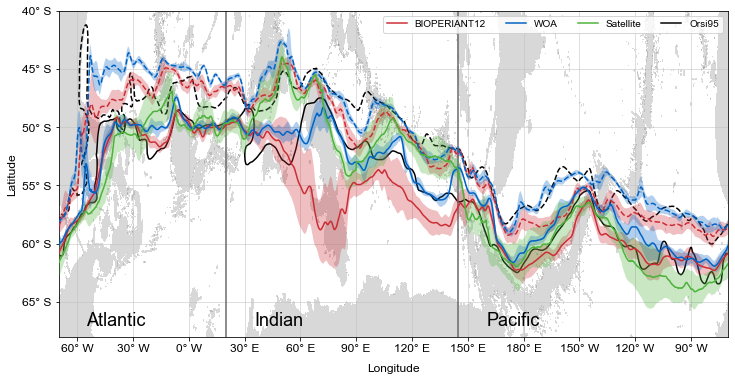

In [17]:
latmin, latmax = -68, -40

fig, ax = plt.subplots(figsize=[12, 6])
# --- SAF ---
plt.plot(saf_mdl_lon, saf_mdl_mean, color=red,linestyle='--', zorder=10)
plt.fill_between(saf_mdl_lon, saf_mdl_mean-saf_mdl_std, saf_mdl_mean+saf_mdl_std
                 , alpha=0.3, facecolor=red, zorder=10)

plt.plot(saf_obs_lon, saf_obs_mean, color=blue,linestyle='--', zorder=10)
plt.fill_between(saf_obs_lon, saf_obs_mean-saf_obs_std, saf_obs_mean+saf_obs_std
                 , alpha=0.3, facecolor=blue, zorder=10)

plt.plot(saf_ors_lon,  saf_ors_lat, 'k--')

# --- PF ---
plt.plot(pf_mdl_lon,  pf_mdl_mean, color=red, label="BIOPERIANT12", zorder=10)
plt.fill_between(pf_mdl_lon,  pf_mdl_mean-pf_mdl_std, pf_mdl_mean+pf_mdl_std
                 , alpha=0.3, facecolor=red, zorder=10)

plt.plot(pf_obs_lon, pf_obs_mean, blue, label='WOA', zorder=10)
plt.fill_between(pf_obs_lon, pf_obs_mean-pf_obs_std, pf_obs_mean+pf_obs_std
                 , alpha=0.3, facecolor=blue, zorder=10)

plt.plot(pf_sat_lon, pf_sat_mean, green, label='Satellite', zorder=10)
plt.fill_between(pf_sat_lon, pf_sat_mean-pf_sat_std, pf_sat_mean+pf_sat_std
                 , alpha=0.3, facecolor=green, zorder=10)

plt.plot(pf_ors_lon,  pf_ors_lat, 'k', label='Orsi95')

# --- MASK ---
plt.contourf(mask_mdl_lon, mask_mdl.lat, mask_mdl_val, [1,2], cmap=cmap_mask, zorder=50)

# Bathy
plt.contourf(bathy_mdl_lon, bathy_mdl.lat, bathy_mdl_val, [0,3000], cmap=cmap_mask, zorder=0)

#-- clean up ---
plt.xticks(xticks, xticklabels)
plt.xlim([-70,290])
plt.xlabel('Longitude', labelpad=10, fontsize=12)
plt.ylim([latmin, latmax])
plt.yticks(yticks, yticklabels)
plt.ylabel('Latitude', labelpad=5, fontsize=12)

plt.plot([20,20], [latmin, latmax], 'dimgrey')
plt.plot([145,145], [latmin, latmax], 'dimgrey')
plt.text(-55,-67,'Atlantic', fontsize=18)
plt.text(35,-67,'Indian', fontsize=18)
plt.text(160,-67,'Pacific', fontsize=18)
plt.legend(loc=1, ncol=5)
ax.grid(zorder=1, lw=1, ls='-', c='0.75', alpha=0.5)

ax.tick_params(labelsize=12)
ax.set_rasterized(True)
plt.savefig(f'../figures/f03.png', bbox_inches='tight')
plt.savefig(f'../figures/f03.eps', bbox_inches='tight')